# Chapter 2: Introduction to Simple Epidemic Model

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Environment-Preparation" data-toc-modified-id="Environment-Preparation-2">Environment Preparation</a></span></li><li><span><a href="#Program-2.1:-Simple-SIR-(without-births-and-deaths)" data-toc-modified-id="Program-2.1:-Simple-SIR-(without-births-and-deaths)-3">Program 2.1: Simple SIR (without births and deaths)</a></span></li><li><span><a href="#Program-2.2:-SIR-model-with-births-and-deaths" data-toc-modified-id="Program-2.2:-SIR-model-with-births-and-deaths-4">Program 2.2: SIR model with births and deaths</a></span></li><li><span><a href="#Program-2.3:-SIR-model-with-disease-induced-mortality-and-density-dependent-transmission" data-toc-modified-id="Program-2.3:-SIR-model-with-disease-induced-mortality-and-density-dependent-transmission-5">Program 2.3: SIR model with disease induced mortality and density dependent transmission</a></span></li><li><span><a href="#Program-2.4:-SIR-model,-disease-induced-mortality-and-frequency-dependent-transmission" data-toc-modified-id="Program-2.4:-SIR-model,-disease-induced-mortality-and-frequency-dependent-transmission-6">Program 2.4: SIR model, disease induced mortality and frequency dependent transmission</a></span></li><li><span><a href="#Program-2.5:-SIS-model-without-births-or-deaths" data-toc-modified-id="Program-2.5:-SIS-model-without-births-or-deaths-7">Program 2.5: SIS model without births or deaths</a></span></li><li><span><a href="#Program-2.6:-SEIR-model-with-births-and-deaths" data-toc-modified-id="Program-2.6:-SEIR-model-with-births-and-deaths-8">Program 2.6: SEIR model with births and deaths</a></span></li><li><span><a href="#Program-2.7:-SIR-+-carrier-state" data-toc-modified-id="Program-2.7:-SIR-+-carrier-state-9">Program 2.7: SIR + carrier state</a></span></li></ul></div>

## Introduction

Chapter 2 discusses the construction of simple epidemic models. For more details please refer back to the book (http://modelinginfectiousdiseases.org/).

## Environment Preparation

In [10]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

In [11]:
pl.style.use('seaborn-whitegrid')
pl.rcParams['font.family'] = "sans-serif"

## Program 2.1: Simple SIR (without births and deaths)

Model 2.1 considers the simplest form of an epidemic model with three classes / categories of individuals: Susceptible - Infected/Infectious - Recovered. The equations governing the model are the following:

$$ \frac{dS}{dt} = - \beta S I$$

$$ \frac{dI}{dt} = \beta S I - \gamma I$$

$$ \frac{dR}{dt} = \gamma I$$

where 
- $\beta$ is the transmission rate,
- $\gamma$ is the removal or recovery rate, while its reciprocal (1/$\gamma$)is the average infectious period.

**Note 1:** All rates are specified in days.

**Note 2:** All parameters must be positive and the sum of populations (S, I, R) should be one. 

[[9.99999000e-01 1.00000000e-06 0.00000000e+00]
 [9.99996055e-01 3.64966741e-06 2.95304063e-07]
 [9.99985485e-01 1.31593559e-05 1.35516202e-06]
 [9.99947369e-01 4.74532092e-05 5.17732698e-06]
 [9.99809987e-01 1.71058575e-04 1.89549056e-05]
 [9.99315303e-01 6.16116637e-04 6.85803972e-05]
 [9.97537151e-01 2.21568587e-03 2.47163570e-04]
 [9.91184992e-01 7.92727469e-03 8.87733548e-04]
 [9.68987928e-01 2.78532303e-02 3.15884192e-03]
 [8.97021359e-01 9.20814169e-02 1.08972243e-02]
 [7.10533894e-01 2.55198783e-01 3.42673227e-02]
 [4.16254892e-01 4.95859506e-01 8.78856016e-02]
 [1.81009913e-01 6.47601951e-01 1.71388136e-01]
 [7.02756394e-02 6.63464569e-01 2.66259791e-01]
 [2.81753698e-02 6.13916972e-01 3.57907658e-01]
 [1.23171971e-02 5.46803480e-01 4.40879323e-01]
 [5.93052075e-03 4.79901640e-01 5.14167839e-01]
 [3.12942081e-03 4.18601275e-01 5.78269304e-01]
 [1.79337332e-03 3.64109920e-01 6.34096706e-01]
 [1.10537879e-03 3.16274314e-01 6.82620307e-01]
 [7.26162083e-04 2.74521454e-01 7.247523

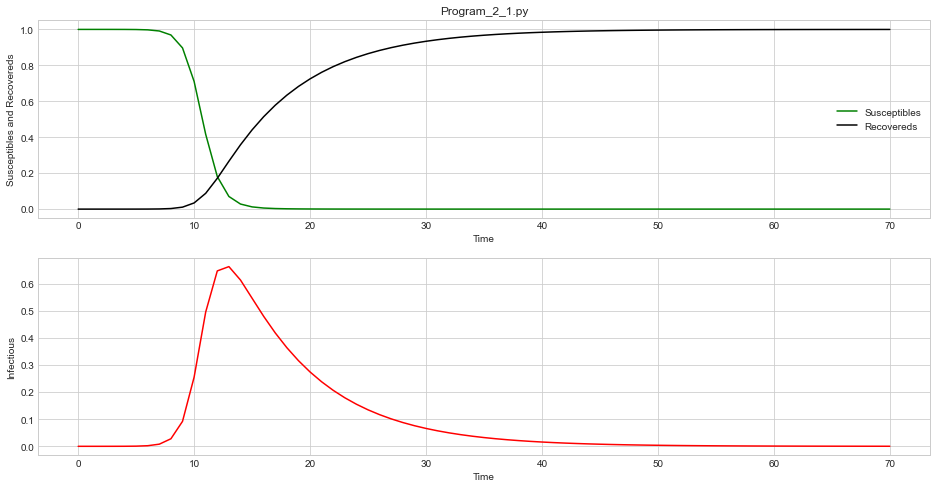

In [12]:
# Parameters
beta=1.4247
gamma=0.14286
TS=1.0
ND=70.0
S0=1-1e-6
I0=1e-6
INPUT = (S0, I0, 0.0)

# Model definition
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP
	Y[0] = - beta * V[0] * V[1]
	Y[1] = beta * V[0] * V[1] - gamma * V[1]
	Y[2] = gamma * V[1]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

#Results
print (RES)

#Plotting
pl.figure(figsize=(16, 8))
pl.subplot(211)
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.plot(RES[:,2], '-k', label='Recovereds')
pl.legend(loc=0)
pl.title('Program_2_1.py')
pl.xlabel('Time')
pl.ylabel('Susceptibles and Recovereds')
pl.subplot(212)
pl.plot(RES[:,1], '-r', label='Infectious')
pl.xlabel('Time')
pl.ylabel('Infectious')
pl.show()


## Program 2.2: SIR model with births and deaths

While Model 2.1 was a base model with no demographic elements, Model 2.2 takes into accounts births and deaths at a standard rate of 1/$\mu$ which represents the natural host life expectancy. It is also assumed that $\mu$ also represents the population average birth rate, ensuring that total population size does not change (dS/dt + dI/dt + dR/dt = 0). The equations governing the model are the following:

$$ \frac{dS}{dt} = \mu - \beta S I - \mu S$$

$$ \frac{dI}{dt} = \beta S I - \gamma I - \mu I$$

$$ \frac{dR}{dt} = \gamma I - \mu R$$

where 
- $\mu$ represents the birth rate and the death rate,
- $\beta$ is the transmission rate,
- $\gamma$ is the removal or recovery rate, while its reciprocal (1/$\gamma$)is the average infectious period.

**Note 1:** All rates are specified in days.

**Note 2:** All parameters must be positive and the sum of populations (S, I, R) should be one. 


[[1.00000000e-01 1.00000000e-04 8.99900000e-01]
 [1.00020980e-01 9.99584497e-05 8.99879062e-01]
 [1.00041961e-01 9.99199034e-05 8.99858119e-01]
 ...
 [1.00274514e-01 2.48770693e-04 8.99476716e-01]
 [1.00274190e-01 2.48760820e-04 8.99477049e-01]
 [1.00273868e-01 2.48750834e-04 8.99477381e-01]]


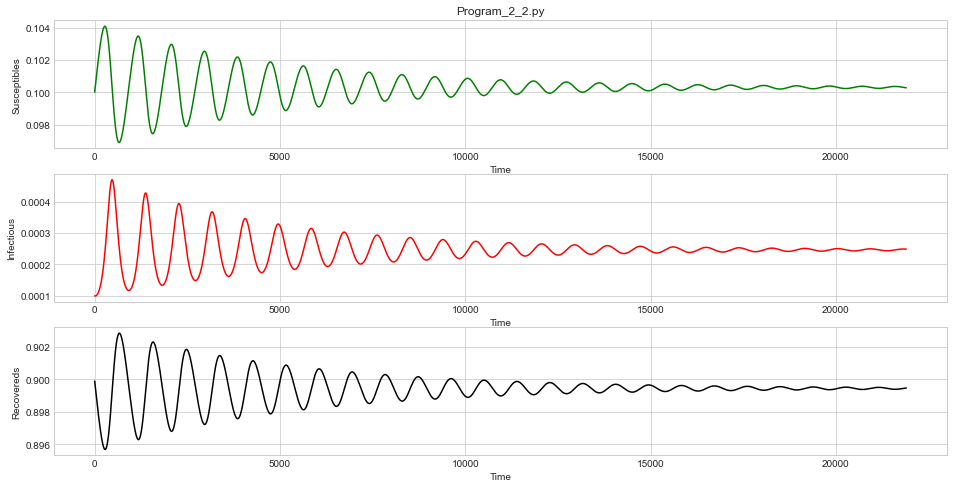

In [13]:
# Parameters
mu=1/(70*365.0)
beta=520/365.0
gamma=1/7.0
TS=1.0
ND=60*365
S0=0.1
I0=1e-4
R0=1-S0-I0
INPUT = (S0, I0, R0)

# Moel defintion
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP
	Y[0] = mu - beta * V[0] * V[1] - mu * V[0]
	Y[1] = beta * V[0] * V[1] - gamma * V[1] - mu * V[1]
	Y[2] = gamma * V[1] - mu * V[2]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

# Results
print (RES)

#Plotting
pl.figure(figsize=(16, 8))
pl.subplot(311)
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.title('Program_2_2.py')
pl.xlabel('Time')
pl.ylabel('Susceptibles')
pl.subplot(312)
pl.plot(RES[:,1], '-r', label='Infectious')
pl.xlabel('Time')
pl.ylabel('Infectious')
pl.subplot(313)
pl.plot(RES[:,2], '-k', label='Recovereds')
pl.xlabel('Time')
pl.ylabel('Recovereds')
pl.show()


## Program 2.3: SIR model with disease induced mortality and density dependent transmission


Model 2.3 introduces diseases induced mortality, i.e death caused by the disease. This is modeled by using the probability $\rho$, which represents the probability of death of an individual before recovery. This model also introduce is a density-dependent model, where we use whole number of individuals compared to proportion that we have used in the previous two models. The equations of the model are as following:


$$ \frac{dX}{dt} = \nu - \beta X Y - \mu X$$

$$ \frac{dX}{dt} = \beta X Y - \frac{\gamma + \mu}{1 - \rho} Y$$

$$ \frac{dZ}{dt} = \gamma Y - \mu Z$$

where 
- $\rho$ is the probability of death because of the disease (mortality), 
- $\mu$ is the per capita death rate from natural causes
- $\nu$ is the population level birth rate
- $\beta$ is the transmission rate,
- $\gamma$ is the removal or recovery rate, while its reciprocal (1/$\gamma$)is the average infectious period.

**Note:** Populations are now in whole numbers, instead of proportions and we use different letters to represent Susceptibles (X), Infected (Y) and Recovered (Z) to differentiate between the two type of models. 

[[2.00000000e-01 1.00000000e-04 7.99900000e-01]
 [2.00002830e-01 9.99141328e-05 7.99882973e-01]
 [2.00005684e-01 9.98287435e-05 7.99865934e-01]
 ...
 [2.00603938e-01 1.09500420e-04 4.07574306e-01]
 [2.00603931e-01 1.09500350e-04 4.07573997e-01]
 [2.00603924e-01 1.09500279e-04 4.07573688e-01]]


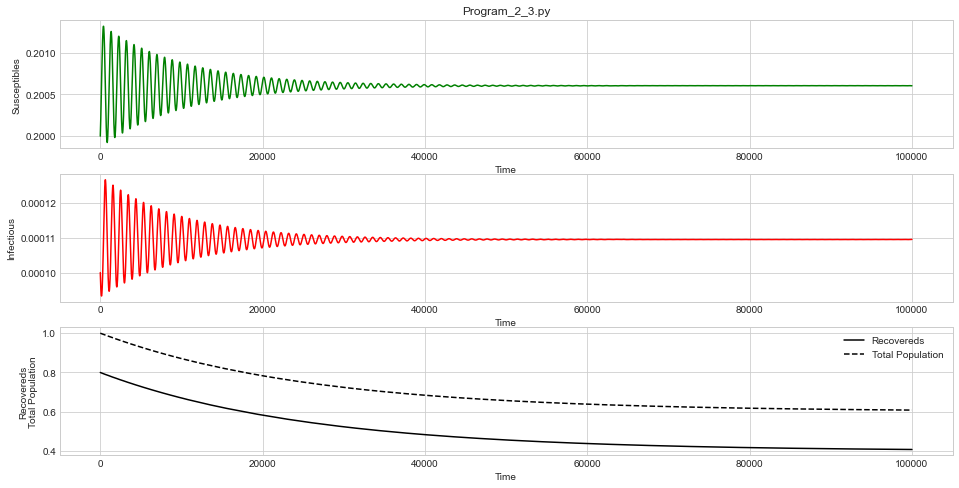

In [14]:
# Parameters
rho=0.5
nu=mu=1/(70*365.0)
beta=520/365.0
gamma=1/7.0
TS=1.0
ND=1e5
N0=1
X0=0.2
Y0=1e-4
Z0=N0-X0-Y0
INPUT = (X0, Y0, Z0)

# Model definition
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP
	Y[0] = mu - beta * V[0] * V[1] - mu * V[0]
	Y[1] = beta * V[0] * V[1] - (gamma + mu) * V[1]/(1-rho)
	Y[2] = gamma * V[1] - mu * V[2]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

# Results
print (RES)

#Plotting
pl.figure(figsize=(16, 8))
pl.subplot(311)
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.title('Program_2_3.py')
pl.xlabel('Time')
pl.ylabel('Susceptibles')
pl.subplot(312)
pl.plot(RES[:,1], '-r', label='Infectious')
pl.xlabel('Time')
pl.ylabel('Infectious')
pl.subplot(313)
pl.plot(RES[:,2], '-k', label='Recovereds')
pl.plot(sum((RES[:,0],RES[:,1],RES[:,2])), '--k', label='Total Population')
pl.xlabel('Time')
pl.legend(loc=0)
pl.ylabel('Recovereds\nTotal Population')
pl.show()


## Program 2.4: SIR model, disease induced mortality and frequency dependent transmission


Model 2.4 follows exactly the same rationale and equations with Model 2.3 with the only difference Model 2.4 to be a frequency-based model. This translates to the case that the interaction term is divided by the total population, so as the populations decreases due to disease induced mortality, the rate of interaction between hosts remains the same.  The equations of the model are as following:


$$ \frac{dX}{dt} = \nu - \frac{\beta X Y}{N} - \mu X$$

$$ \frac{dX}{dt} = \frac{\beta X Y}{N} - \frac{\gamma + \mu}{1 - \rho} Y$$

$$ \frac{dZ}{dt} = \gamma Y - \mu Z$$

where 
- $\rho$ is the probability of death because of the disease (mortality), 
- $\mu$ is the per capita death rate from natural causes
- $\nu$ is the population level birth rate
- $\beta$ is the transmission rate,
- $\gamma$ is the removal or recovery rate, while its reciprocal (1/$\gamma$)is the average infectious period.

**Note:** Populations are now in whole numbers, instead of proportions and we use different letters to represent Susceptibles (X), Infected (Y) and Recovered (Z) to differentiate between the two type of models. 

[[2.00000000e-01 1.00000000e-04 7.99900000e-01]
 [2.00002830e-01 9.99143360e-05 7.99882973e-01]
 [2.00005683e-01 9.98295555e-05 7.99865934e-01]
 ...
 [1.13264157e-01 1.21666321e-04 4.51232133e-01]
 [1.13264092e-01 1.21666097e-04 4.51231853e-01]
 [1.13264026e-01 1.21665874e-04 4.51231574e-01]]


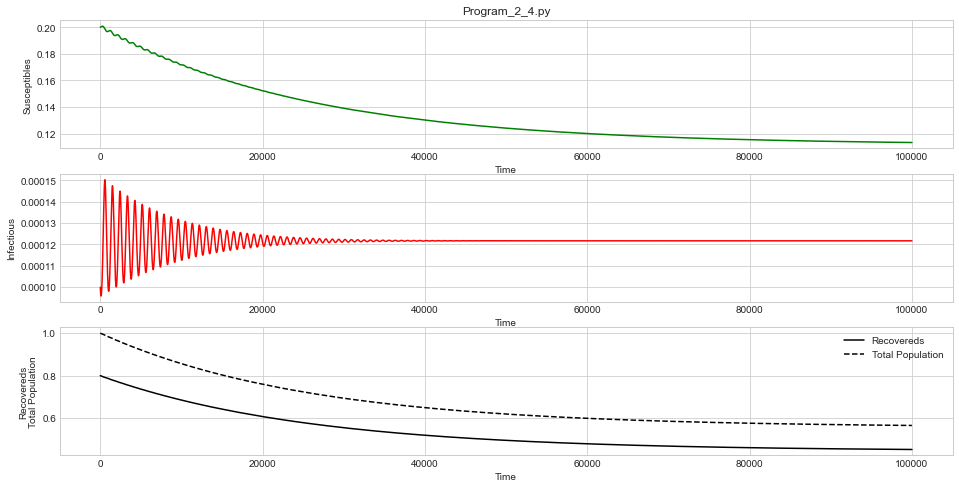

In [19]:
# Parameters
rho=0.5
nu=mu=1/(70*365.0)
beta=520/365.0
gamma=1/7.0
TS=1.0
ND=1e5
N0=1
X0=0.2
Y0=1e-4
Z0=N0-X0-Y0
INPUT = (X0, Y0, Z0)

# Model defintion
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP
	Y[0] = mu - beta * V[0] * V[1] / sum(V) - mu * V[0]
	Y[1] = beta * V[0] * V[1] / sum(V) - (gamma + mu) * V[1]/(1-rho)
	Y[2] = gamma * V[1] - mu * V[2]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

# Results
print (RES)

#Ploting
pl.figure(figsize=(16, 8))
pl.subplot(311)
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.title('Program_2_4.py')
pl.xlabel('Time')
pl.ylabel('Susceptibles')
pl.subplot(312)
pl.plot(RES[:,1], '-r', label='Infectious')
pl.xlabel('Time')
pl.ylabel('Infectious')
pl.subplot(313)
pl.plot(RES[:,2], '-k', label='Recovereds')
pl.plot(sum((RES[:,0],RES[:,1],RES[:,2])), '--k', label='Total Population')
pl.xlabel('Time')
pl.legend(loc=0)
pl.ylabel('Recovereds\nTotal Population')
pl.show()


## Program 2.5: SIS model without births or deaths


[[9.99999000e-01 1.00000000e-06]
 [9.99996350e-01 3.64966805e-06]
 [9.99986841e-01 1.31593720e-05]
 [9.99952547e-01 4.74534621e-05]
 [9.99828938e-01 1.71062084e-04]
 [9.99383837e-01 6.16163188e-04]
 [9.97783707e-01 2.21629259e-03]
 [9.92064920e-01 7.93507958e-03]
 [9.72049498e-01 2.79505021e-02]
 [9.06822569e-01 9.31774305e-02]
 [7.35552109e-01 2.64447891e-01]
 [4.60173813e-01 5.39826187e-01]
 [2.40753736e-01 7.59246264e-01]
 [1.44217695e-01 8.55782305e-01]
 [1.12915432e-01 8.87084568e-01]
 [1.03818122e-01 8.96181878e-01]
 [1.01260206e-01 8.98739794e-01]
 [1.00547728e-01 8.99452272e-01]
 [1.00349796e-01 8.99650204e-01]
 [1.00294851e-01 8.99705149e-01]
 [1.00279599e-01 8.99720401e-01]
 [1.00275367e-01 8.99724633e-01]
 [1.00274194e-01 8.99725806e-01]
 [1.00273868e-01 8.99726132e-01]
 [1.00273776e-01 8.99726224e-01]
 [1.00273751e-01 8.99726249e-01]
 [1.00273745e-01 8.99726255e-01]
 [1.00273743e-01 8.99726257e-01]
 [1.00273742e-01 8.99726258e-01]
 [1.00273741e-01 8.99726259e-01]
 [1.002737

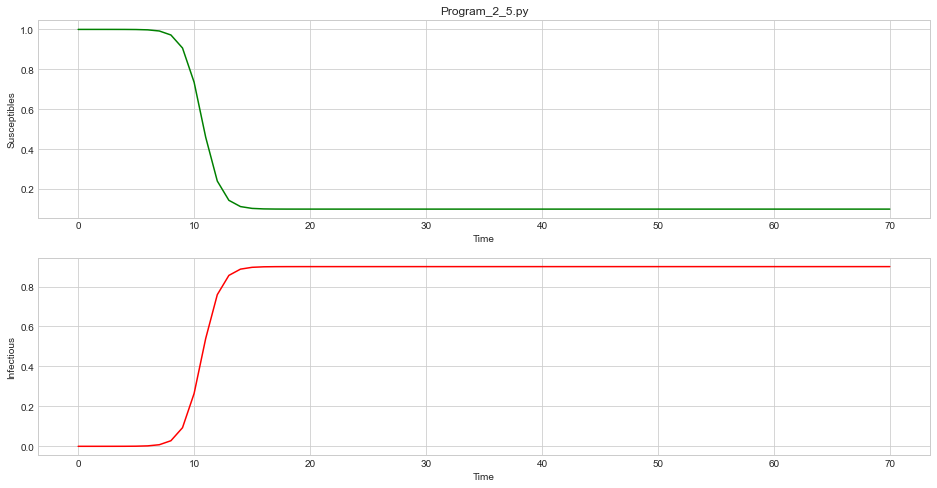

In [16]:
# Parameters
beta=1.4247
gamma=0.14286
I0=1e-6
ND=70
TS=1.0
INPUT = (1.0-I0, I0)

# Model definition
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((2))
	V = INP
	Y[0] = - beta * V[0] * V[1] + gamma * V[1]
	Y[1] = beta * V[0] * V[1] - gamma * V[1]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

# Results
print (RES)

#Ploting
pl.figure(figsize=(16, 8))
pl.subplot(211)
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.title('Program_2_5.py')
pl.xlabel('Time')
pl.ylabel('Susceptibles')
pl.subplot(212)
pl.plot(RES[:,1], '-r', label='Infectious')
pl.xlabel('Time')
pl.ylabel('Infectious')
pl.show()


## Program 2.6: SEIR model with births and deaths


[[1.00000000e-01 1.00000000e-04 1.00000000e-04]
 [1.00021446e-01 1.06397686e-04 9.35580806e-05]
 [1.00043719e-01 1.11555165e-04 8.83614004e-05]
 ...
 [1.00569848e-01 4.79592191e-04 2.39564544e-04]
 [1.00570725e-01 4.79641168e-04 2.39588298e-04]
 [1.00571598e-01 4.79690348e-04 2.39612156e-04]]


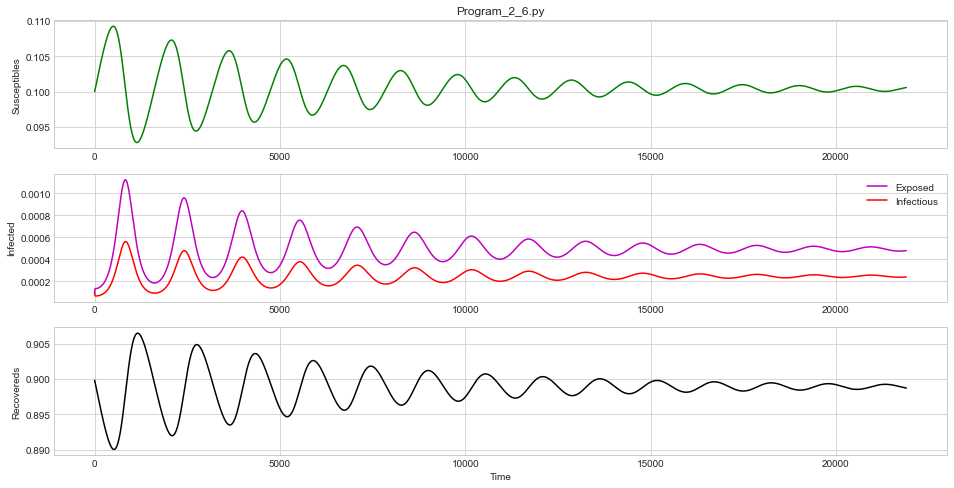

In [17]:
# Parameters
mu=1/(70*365.0)
beta=520/365.0
sigma=1/14.0
gamma=1/7.0
ND=60*365.0
TS=1.0
S0=0.1
E0=1e-4
I0=1e-4
INPUT = (S0, E0, I0)

# Model defintion
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP
	Y[0] = mu - beta * V[0] * V[2] - mu * V[0]
	Y[1] = beta * V[0] * V[2] - sigma * V[1] - mu * V[1]
	Y[2] = sigma * V[1] - gamma * V[2] - mu * V[2]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

Rec=1. - (RES[:,0]+RES[:,1]+RES[:,2])

# Results
print (RES)

#Ploting
pl.figure(figsize=(16, 8))
pl.subplot(311)
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.title('Program_2_6.py')
#pl.xlabel('Time')
pl.ylabel('Susceptibles')
pl.subplot(312)
pl.plot(RES[:,1], '-m', label='Exposed')
pl.plot(RES[:,2], '-r', label='Infectious')
pl.legend(loc=0)
#pl.xlabel('Time')
pl.ylabel('Infected')
pl.subplot(313)
pl.plot(Rec, '-k', label='Recovereds')
pl.xlabel('Time')
pl.ylabel('Recovereds')
pl.show()


## Program 2.7: SIR + carrier state


[[1.00000000e-01 1.00000000e-04 1.00000000e-03]
 [1.00045283e-01 1.03009779e-04 9.99351573e-04]
 [1.00090503e-01 1.06050215e-04 9.98715922e-04]
 ...
 [3.64509971e-02 5.25094824e-03 1.99126869e-02]
 [3.64509971e-02 5.25094824e-03 1.99126869e-02]
 [3.64509971e-02 5.25094824e-03 1.99126869e-02]]


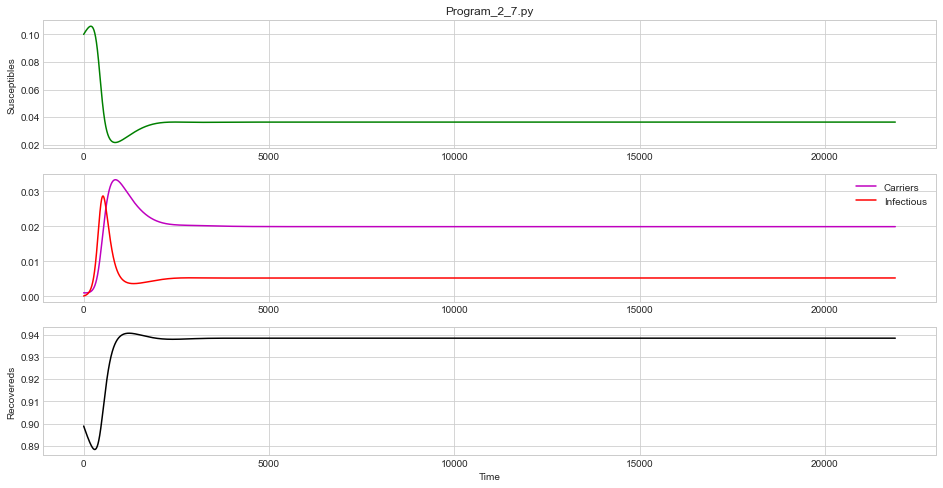

In [18]:
# Parameters
beta=0.2
epsilon=0.1
gamma=0.01
Gamma=0.001
mu=1/(50*365.0)
q=0.4
S0=0.1
I0=1e-4
C0=1e-3
ND=60*365
TS=1.0
INPUT = (S0, I0, C0)

# Model defintion
def diff_eqs(INP,t):
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP
	Y[0] = mu - beta * V[0] * (V[1] + epsilon * V[2]) - mu * V[0]
	Y[1] = beta * V[0] * (V[1] + epsilon * V[2]) - gamma * V[1] - mu * V[1]
	Y[2] = q * gamma * V[1] - Gamma * V[2] - mu * V[2]
	return Y   # For odeint

# Model Run
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

Rec=1. - (RES[:,0]+RES[:,1]+RES[:,2])

# Results
print (RES)

#Ploting
pl.figure(figsize=(16, 8))
pl.subplot(311)
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.title('Program_2_7.py')
#pl.xlabel('Time')
pl.ylabel('Susceptibles')
pl.subplot(312)
pl.plot(RES[:,2], '-m', label='Carriers')
pl.plot(RES[:,1], '-r', label='Infectious')
#pl.xlabel('Time')
pl.legend(loc=0)
pl.subplot(313)
pl.plot(Rec, '-k', label='Recovereds')
pl.xlabel('Time')
pl.ylabel('Recovereds')
pl.show()
